In [2]:
!apt install cmake libopenmpi-dev zlib1g-dev
!pip install stable-baselines==2.2.0
!apt-get install python-opengl

Reading package lists... Done
Building dependency tree       
Reading state information... Done
zlib1g-dev is already the newest version (1:1.2.11.dfsg-0ubuntu2).
zlib1g-dev set to manually installed.
The following additional packages will be installed:
  autotools-dev cmake-data file ibverbs-providers libarchive13 libfabric1
  libhwloc-dev libhwloc-plugins libhwloc5 libibverbs-dev libibverbs1
  libjsoncpp1 libltdl-dev libltdl7 liblzo2-2 libmagic-mgc libmagic1
  libnl-3-200 libnl-route-3-200 libnuma-dev libnuma1 libopenmpi2 libpciaccess0
  libpsm-infinipath1 librdmacm1 librhash0 libtool libuv1 ocl-icd-libopencl1
  openmpi-bin openmpi-common
Suggested packages:
  cmake-doc ninja-build lrzip libhwloc-contrib-plugins libtool-doc openmpi-doc
  pciutils autoconf automaken gcj-jdk
The following NEW packages will be installed:
  autotools-dev cmake cmake-data file ibverbs-providers libarchive13
  libfabric1 libhwloc-dev libhwloc-plugins libhwloc5 libibverbs-dev
  libibverbs1 libjsoncpp1 liblt

In [0]:
from stable_baselines.common.atari_wrappers import make_atari # Used to obtain the atari environments with Noframeskips
from stable_baselines.deepq.policies import MlpPolicy, CnnPolicy # Policy network based on which decisions are taken
from stable_baselines import DQN # Base DQN library which imlements all the algorithms of Q learning
from stable_baselines.common.vec_env import DummyVecEnv # Transforms the image data to feed to the MLP networks
import gym # Used to import atari game environments


# Imports for exporting the gameplay video 

import time
import matplotlib
#matplotlib.use("Agg")
import matplotlib.pyplot as plt
from matplotlib.image import imread
from matplotlib import rc, animation
from IPython import display
from IPython.display import HTML
%matplotlib inline

In [0]:
env = make_atari('DemonAttackNoFrameskip-v0') #creates an environment in such a way that it can be fed to an CNN policy

model = DQN(CnnPolicy, env, verbose=1) # Model definition 
model.learn(total_timesteps=10000) # model training 
model.save("DemonAttackNoFrameskip") # save model


/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [0]:
frames = [] # Save the gameplay frames
for i in range(1): # Only one gameplay
  obs = env.reset() # Reset environment
  while True: 
      action, _states = model.predict(obs) # returns the states, action, based on current state 
      obs, rewards, dones, info = env.step(action) # takes nect action and returns is the game over, rewards and the next state
      fig = env.render(mode = 'rgb_array') # Render image and save them 
      frames.append(fig)
      if dones == True: # if gameover then exit
        i+=1
        break

In [8]:
!apt install ffmpeg
!which ffmpeg
plt.rcParams['animation.ffmpeg_path'] = u'/usr/bin/ffmpeg'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fontconfig i965-va-driver libaacs0 libasound2 libasound2-data libass9
  libasyncns0 libavc1394-0 libavcodec57 libavdevice57 libavfilter6
  libavformat57 libavresample3 libavutil55 libbdplus0 libbluray2 libbs2b0
  libcaca0 libcairo2 libcdio-cdda2 libcdio-paranoia2 libcdio17 libchromaprint1
  libcroco3 libcrystalhd3 libdatrie1 libdc1394-22 libfftw3-double3 libflac8
  libflite1 libfribidi0 libgdk-pixbuf2.0-0 libgdk-pixbuf2.0-bin
  libgdk-pixbuf2.0-common libgme0 libgsm1 libiec61883-0 libjack-jackd2-0
  libjbig0 libmp3lame0 libmpg123-0 libmysofa0 libogg0 libopenal-data
  libopenal1 libopenjp2-7 libopenmpt0 libopus0 libpango-1.0-0
  libpangocairo-1.0-0 libpangoft2-1.0-0 libpixman-1-0 libpostproc54 libpulse0
  libraw1394-11 librsvg2-2 librsvg2-common librubberband2 libsamplerate0
  libsdl2-2.0-0 libshine3 libslang2 libsnappy1v5 libsndfile1 lib

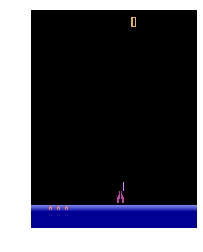

In [9]:
"""
This cell will compile the frames that should have been saved during training
into an animation.  This required ffmpeg to be installed.

If the main portion wasn't modified, this will have saved frames from every
1,000 episode.  In the animation, you should see it start off performing poorly,
but as it progresses it should perform optimally.
"""

fig, ax = plt.subplots()
plt.axis('off')
l = ax.imshow(frames[0])

def animate(i):
    l.set_data(frames[i])

Writer = animation.writers['ffmpeg']
writer = Writer(fps=12, metadata=dict(artist='Me'))
ani = animation.FuncAnimation(fig, animate, frames=len(frames))

ani.save('cnnatari.mp4', writer=writer, dpi=220)
time.sleep(5) # let it process (only necessary in Colab)

In [0]:
try:
  from google.colab import files
except:
  print("Could not import Google Colab.")
  
files.download('cnnatari.mp4')